In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
from wordcloud import WordCloud


In [17]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')


In [18]:
data_fake['class'] = 0
data_true['class'] = 1


In [19]:
data_merge = pd.concat([data_fake, data_true], axis=0)


In [20]:
data_merge.reset_index(drop=True, inplace=True)
data = data_merge.drop(['title', 'subject', 'date'], axis=1)


In [21]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*d\w*', '', text)
    return text


In [22]:
data['text'] = data['text'].apply(wordopt)


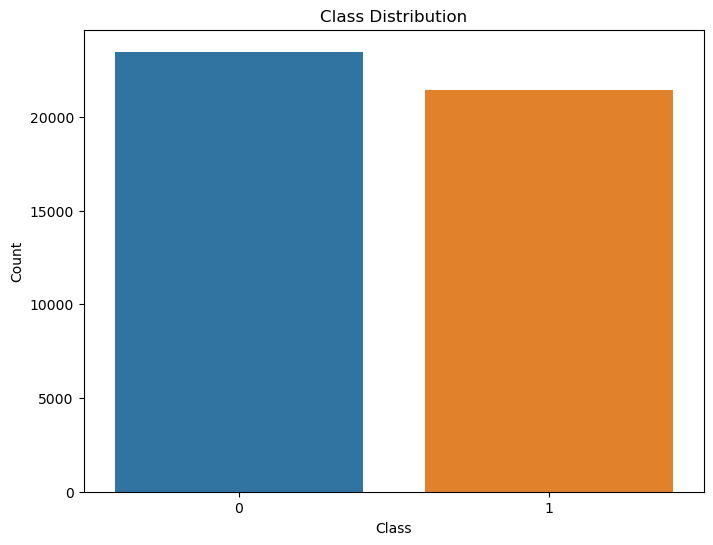

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


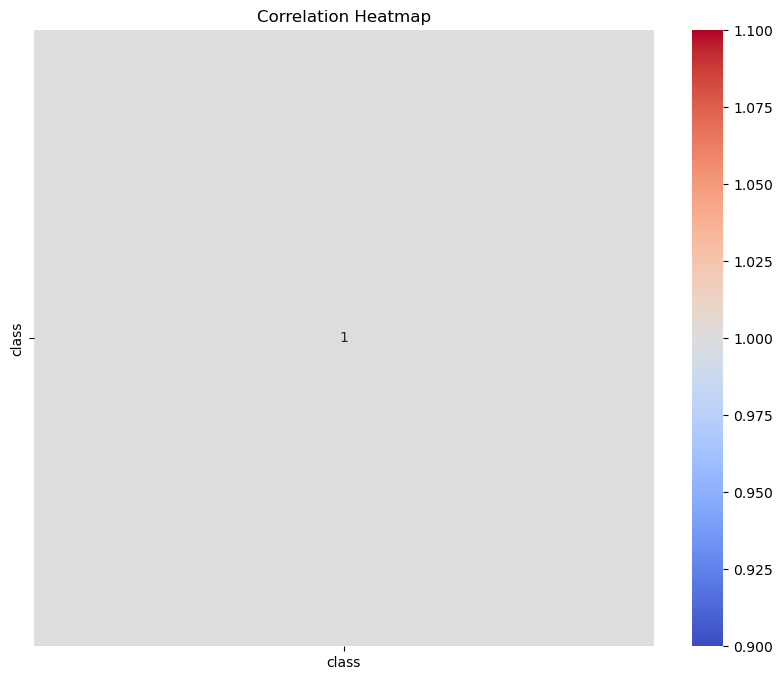

In [25]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['float', 'int']).columns

# Drop non-numeric columns or convert them to numeric
numeric_data = data.drop(columns=non_numeric_columns)

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


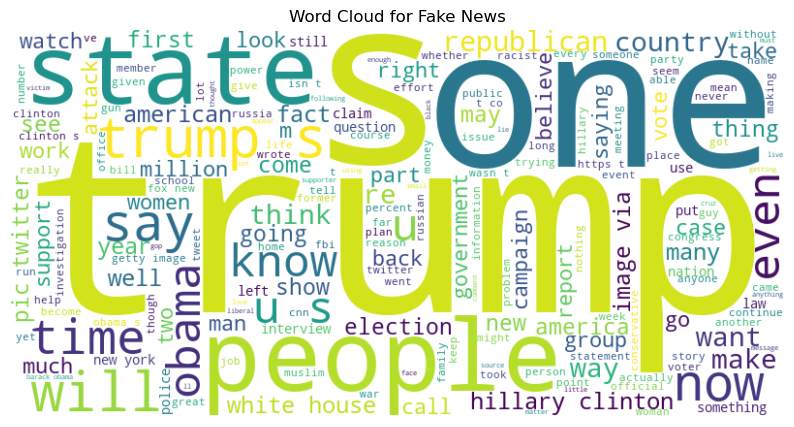

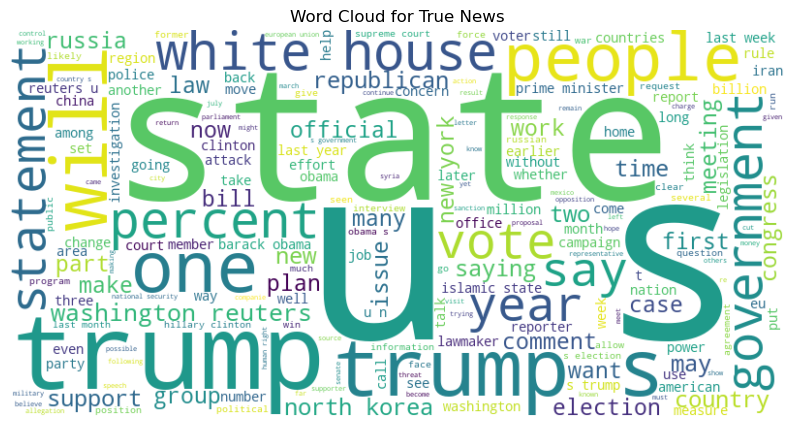

In [26]:
fake_text = ' '.join(data[data['class'] == 0]['text'])
true_text = ' '.join(data[data['class'] == 1]['text'])

fake_cloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
true_cloud = WordCloud(width=800, height=400, background_color='white').generate(true_text)

plt.figure(figsize=(10, 6))
plt.imshow(fake_cloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(true_cloud, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')
plt.show()


In [27]:
x = data['text']
y = data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)


In [29]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)


LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_lr = LR.predict(xv_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Confusion Matrix:")
print(confusion_lr)


Logistic Regression Accuracy: 0.9831625835189309
Confusion Matrix:
[[5782  113]
 [  76 5254]]


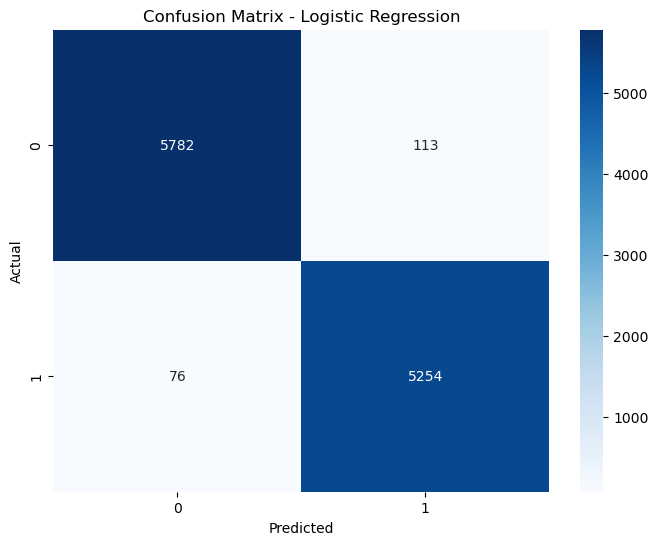

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_lr, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
